In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("D:/My/Data Analyst/Pangan_jateng_analysis/data/processed/pangan_jateng_2019_2023.csv")


In [4]:
#RENAME KOLOM UNTUK MEMUDAHKAN ANALISIS
df = df.rename(columns={
    'tahun_data': 'tahun',
    'bulan_data': 'bulan',
    'komoditas_pangan': 'komoditas',
    'ketersdiaan_data': 'ketersediaan',
    'kebutuhan_data': 'kebutuhan',
    'deviasi_data': 'deviasi'
})
df.columns


Index(['tahun', 'komoditas', 'bulan', 'ketersediaan', 'kebutuhan', 'deviasi',
       'bulan_num', 'date'],
      dtype='object')

In [3]:
# Standardize month names to lowercase
df['bulan_data'] = df['bulan_data'].str.lower()

bulan_map = {
    'januari':1, 'februari':2, 'maret':3, 'april':4,
    'mei':5, 'juni':6, 'juli':7, 'agustus':8,
    'september':9, 'oktober':10, 'november':11, 'desember':12
}

df['bulan_num'] = df['bulan_data'].map(bulan_map)
df['date'] = pd.to_datetime(dict(year=df['tahun_data'], month=df['bulan_num'], day=1))


In [5]:
#PREPROCESSING/CLEANING DATA KOMODITAS
df['komoditas'] = (
    df['komoditas']
    .astype(str)
    .str.strip()
    .str.lower()
)
komoditas_map = {
    # GULA
    'gula': 'gula',
    'gula pasir': 'gula',
    'gula konsumsi': 'gula',

    # CABAI RAWIT
    'cabai rawit': 'cabai rawit',
    'cabe rawit': 'cabai rawit',

    # CABAI BESAR
    'cabai besar': 'cabai besar',
    'cabe besar': 'cabai besar',
    'cabai merah': 'cabai besar',

    # DAGING
    'daging sapi': 'daging sapi',
    'daging sapi / kerbau': 'daging sapi',
    'daging total': 'daging sapi',
    'daging' : 'daging sapi',
    

}

df['komoditas'] = df['komoditas'].replace(komoditas_map)


In [6]:
#CEK NILAI UNIK KOMODITAS SETELAH PREPROCESSING
df['komoditas'].value_counts()


komoditas
daging sapi      50
cabai rawit      38
kedelai          38
gula             38
telur            38
jagung           38
bawang merah     38
cabai besar      38
minyak goreng    36
daging ayam      36
bawang putih     36
beras            36
garam             2
padi              2
ikan              2
ubi jalar         2
ubi kayu          2
k. hijau          2
k. tanah          2
susu              2
Name: count, dtype: int64

### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "BERAS" ###

In [7]:
komoditas = "beras"
df_k = df[df['komoditas'] == komoditas]


In [8]:
ts = df_k.groupby('date').agg({
    'ketersediaan':'sum',
    'kebutuhan':'sum'
}).reset_index()


In [11]:
ts['selisih'] = ts['ketersediaan'] - ts['kebutuhan']
ts['time_index'] = np.arange(len(ts))


In [12]:
from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersediaan']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [13]:
future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)


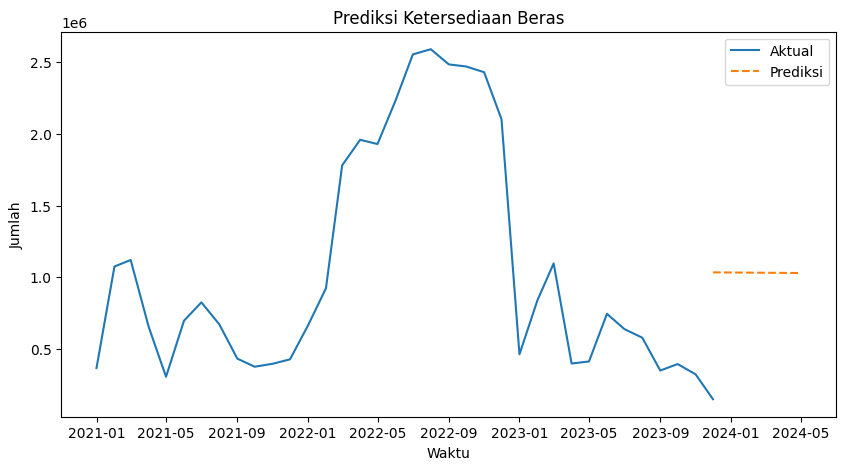

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersediaan'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()


### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "TELUR" ###

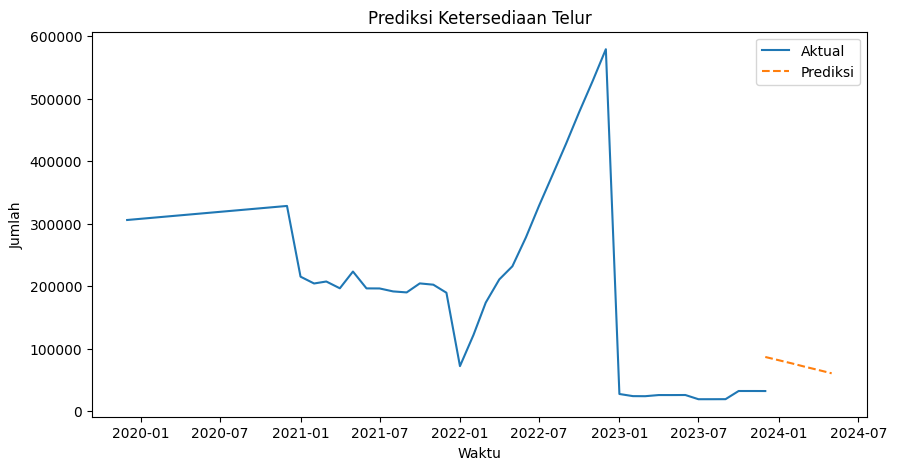

In [15]:
komoditas = "telur"
df_k = df[df['komoditas'] == komoditas]

ts = df_k.groupby('date').agg({
    'ketersediaan':'sum',
    'kebutuhan':'sum'
}).reset_index()

ts['selisih'] = ts['ketersediaan'] - ts['kebutuhan']
ts['time_index'] = np.arange(len(ts))

from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersediaan']

model = LinearRegression()
model.fit(X, y)

future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersediaan'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()



### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "DAGING AYAM" ###

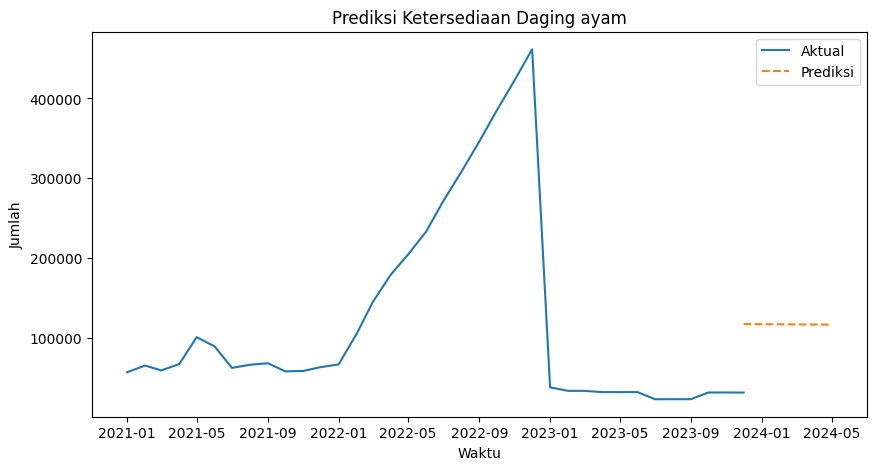

In [16]:

komoditas = "daging ayam"
df_k = df[df['komoditas'] == komoditas]

ts = df_k.groupby('date').agg({
    'ketersediaan':'sum',
    'kebutuhan':'sum'
}).reset_index()

ts['selisih'] = ts['ketersediaan'] - ts['kebutuhan']
ts['time_index'] = np.arange(len(ts))

from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersediaan']

model = LinearRegression()
model.fit(X, y)

future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersediaan'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()



### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "BAWANG MERAH" ###

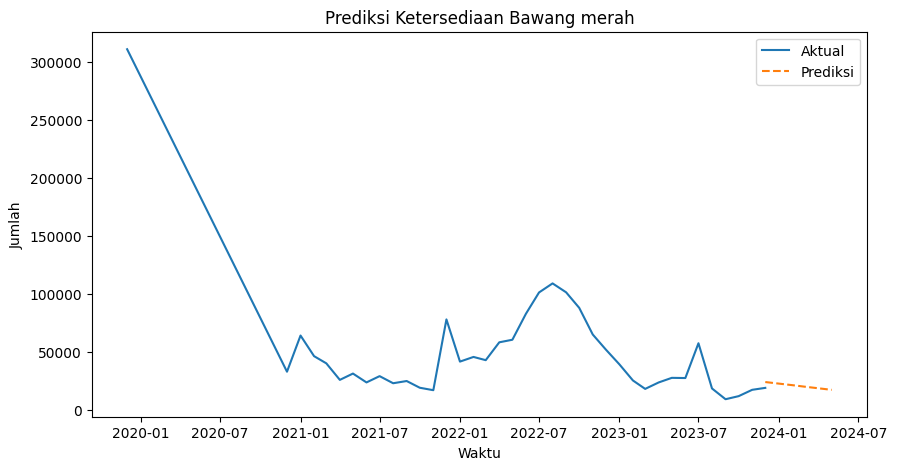

In [17]:

komoditas = "bawang merah"
df_k = df[df['komoditas'] == komoditas]

ts = df_k.groupby('date').agg({
    'ketersediaan':'sum',
    'kebutuhan':'sum'
}).reset_index()

ts['selisih'] = ts['ketersediaan'] - ts['kebutuhan']
ts['time_index'] = np.arange(len(ts))

from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersediaan']

model = LinearRegression()
model.fit(X, y)

future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersediaan'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()



### ANALISIS POLA MUSIMAN ###

In [18]:
komoditas_list = [
    'beras',
    'jagung',
    'kedelai',
    'bawang merah',
    'telur'
]


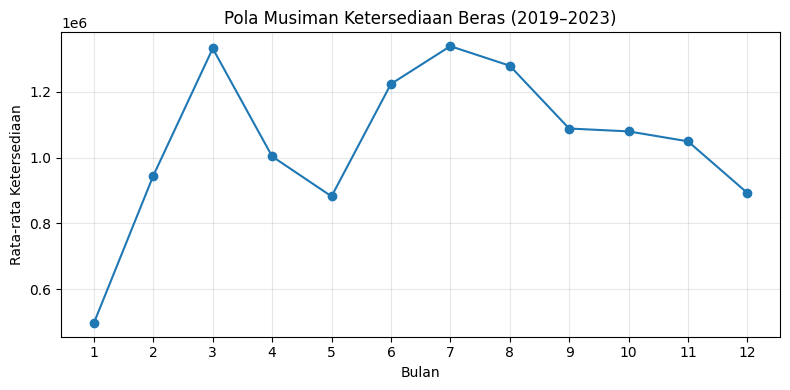

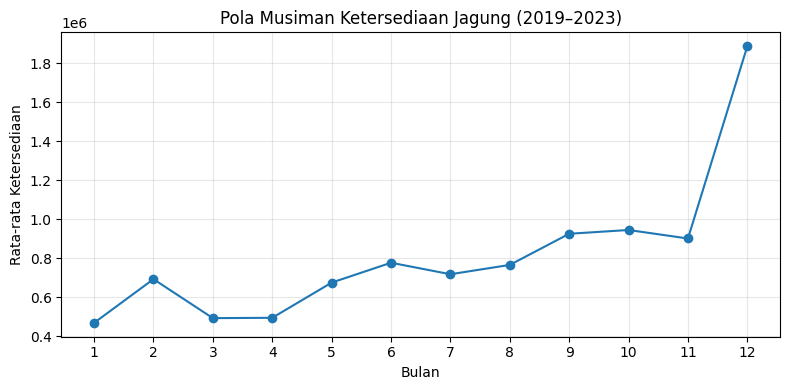

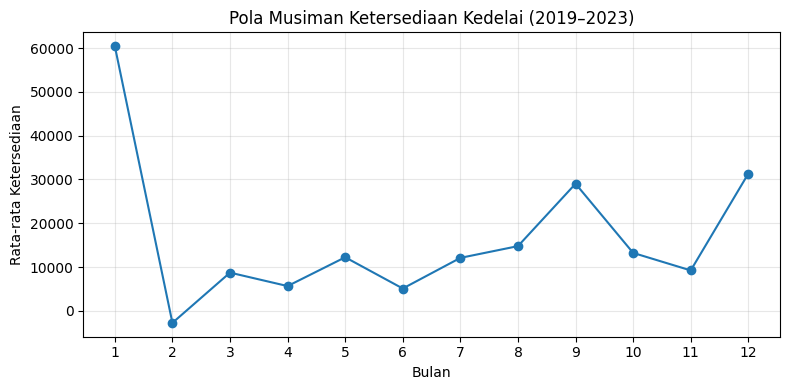

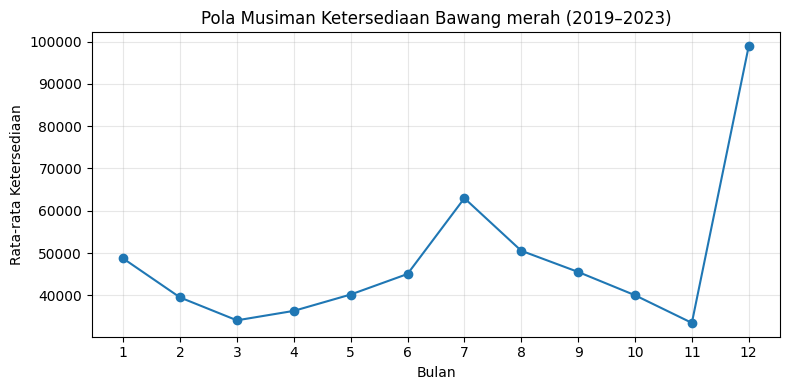

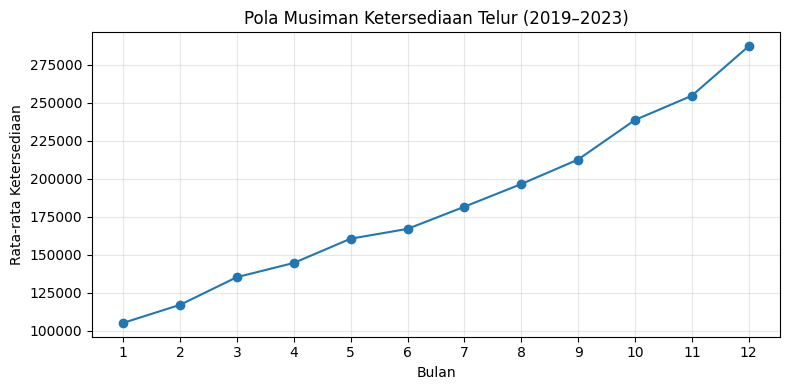

In [19]:
import matplotlib.pyplot as plt

for komoditas in komoditas_list:
    df_k = df[df['komoditas'] == komoditas]
    
    seasonal = (
        df_k.groupby('bulan_num')['ketersediaan']
        .mean()
        .reset_index()
    )
    
    plt.figure(figsize=(8,4))
    plt.plot(
        seasonal['bulan_num'],
        seasonal['ketersediaan'],
        marker='o'
    )
    
    plt.title(f'Pola Musiman Ketersediaan {komoditas.capitalize()} (2019–2023)')
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata Ketersediaan')
    plt.xticks(range(1,13))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
